# Linear Regression Train Test

`Business Student:` Predict the life span(y) of human based on parameters region(X1), population(X2), 
    fertility(X3), HIV(X4), BMI(X5), CO2(X6), GDP(X7)...etc

In [1]:
import os

os.chdir("E:/code/6.MachineLearning/2_Linear_Regression/data")
os.getcwd()

'E:\\code\\6.MachineLearning\\2_Linear_Regression\\data'

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

### Step 1: import data

In [3]:
df = pd.read_csv('gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [5]:
#df.info()

### Step2: Preprocessing of data
- Hence it is a balanced data no need of preprocessing

### Step 3: identify the X and y variable

In [10]:
X=df[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
      'BMI_female',  'child_mortality']]
y=df["life"]

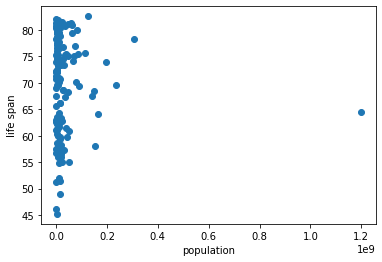

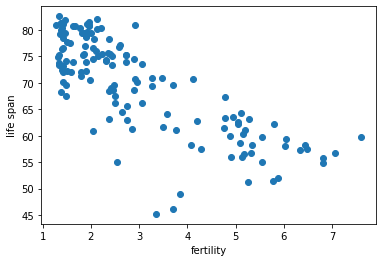

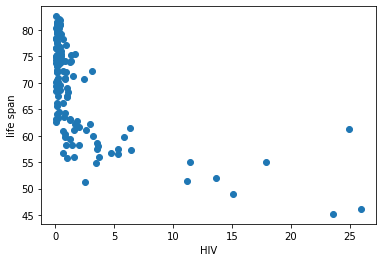

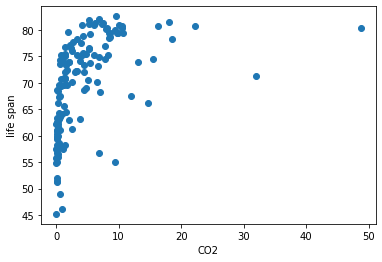

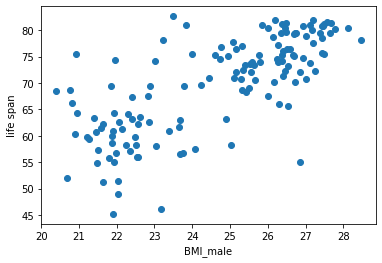

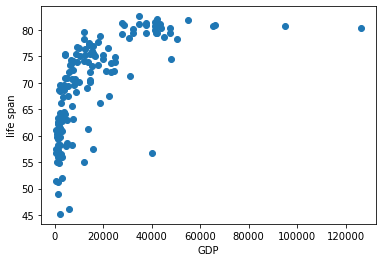

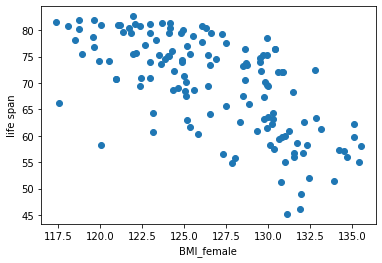

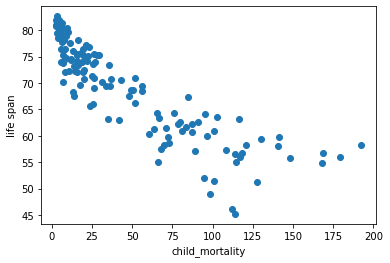

In [11]:
import matplotlib.pyplot as plt

for col in X.columns:
    if col!=["life"]:
        plt.scatter(X[col],y)
        plt.xlabel(col)
        plt.ylabel("life span")
        plt.show()

In [12]:
X = X.values
y = y.values

### Step 4: split the data into train and test

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state=42)

### Step 5: fit / train the model

In [8]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

In [9]:
lr_model.coef_

array([-2.03205166e-09, -3.30810286e-01, -7.21234146e-01, -1.47522293e-01,
        4.93199538e-01,  1.37767248e-04, -2.52417353e-01, -8.67212952e-02])

In [10]:
lr_model.intercept_

94.03778830116256

In [11]:
# linear equation as for maths 
'''life = 94.03778830116201 + (- 0.00000000203) * population - 0.3308 *fertility - 0.721 * HIV - 0.1475 * CO2 +0.493 * BMI_male +0.000137 * GDP - 0.2524 * BMI_female - 0.086 * child_mortality'''

'life = 94.03778830116201 + (- 0.00000000203) * population - 0.3308 *fertility - 0.721 * HIV - 0.1475 * CO2 +0.493 * BMI_male +0.000137 * GDP - 0.2524 * BMI_female - 0.086 * child_mortality'

### Step 6: Predict test data

In [12]:
lr_model.predict([[34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,29.5]])

array([70.97949253])

In [13]:
# Predict on the test data: y_pred
y_test_pred = lr_model.predict(X_test)

### Step 7: metrics(r2 score)

In [17]:
from sklearn.metrics import r2_score

print("R^2: {}".format(r2_score(y_test,y_test_pred))) # Compute and print R^2 # it shoud be near to one

R^2: 0.838046873139459


In [18]:
# Compute and print RMSE # it should be smaller than standard deviation
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 3.2476010800725836


In [19]:
std = np.std(y_test)
print("Standard Deviation σ : {}".format(std))

Standard Deviation σ : 8.069897312257789


In [20]:
rmse <std # For  good model #it must be true

True

### step8: save model

In [26]:
import pickle

filename="lifespan_model.pkl"
pickle.dump(lr_model, open(filename, "wb")) # serialization: object to byte code

In [27]:
# loading the model

filename = "lifespan_model.pkl"
model_loaded = pickle.load(open(filename,'rb'))
a = model_loaded.predict([[34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,29.5]])
a

array([70.97949253])